<h1>数据提取</h1>

In [79]:
from google_auth_oauthlib import flow
from google.cloud import bigquery
import datetime
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
from scipy.optimize import curve_fit
from tqdm.notebook import trange, tqdm
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
user_classification_data = pd.read_csv('retended_user_classification.csv')
user_classification_data.head(10)

,combo_times,crush_rows,crush_times,game_num,total_duration_sec,holders,prop_get,prop_usage,best_record,total_score,...,holders_per_game,prop_get_per_game,prop_usage_per_game,avg_score,record_breaking_possi,duration_per_round,rounds_per_combo,duration_per_combo,crush_rows_per_time,retended
0,12.0,344.0,284.0,24.0,5298.698,61.0,5.0,0.0,707.0,8894.0,...,2.541667,0.208333,0.000000,370.583333,0.208333,11.774884,37.500000,441.558167,1.211268,1
1,36.0,982.0,801.0,28.0,4503.341,25.0,62.0,59.0,2175.0,22922.0,...,0.892857,2.214286,2.107143,818.642857,0.107143,4.476482,27.944444,125.092806,1.225968,1
2,7.0,419.0,377.0,23.0,5681.123,33.0,34.0,35.0,1247.0,9791.0,...,1.434783,1.478261,1.521739,425.695652,0.173913,11.009928,73.714286,811.589000,1.111406,1
3,13.0,419.0,357.0,29.0,4758.865,3.0,63.0,34.0,823.0,10630.0,...,0.103448,2.172414,1.172414,366.551724,0.103448,8.652482,42.307692,366.066538,1.173669,1
4,27.0,543.0,436.0,22.0,6824.291,17.0,5.0,0.0,860.0,13937.0,...,0.772727,0.227273,0.000000,633.500000,0.181818,10.200734,24.777778,252.751519,1.245413,1
5,73.0,814.0,548.0,30.0,13259.141,39.0,5.0,5.0,1794.0,21399.0,...,1.300000,0.166667,0.166667,713.300000,0.166667,15.033040,12.082192,181.632068,1.485401,1
6,26.0,519.0,406.0,19.0,10851.903,29.0,0.0,0.0,983.0,12363.0,...,1.526316,0.000000,0.000000,650.684211,0.263158,17.877929,23.346154,417.380885,1.278325,1
7,9.0,362.0,305.0,24.0,6027.280,32.0,5.0,0.0,655.0,8667.0,...,1.333333,0.208333,0.000000,361.125000,0.250000,12.715781,52.666667,669.697778,1.186885,0
8,16.0,535.0,442.0,21.0,6303.765,84.0,44.0,34.0,1543.0,13002.0,...,4.000000,2.095238,1.619048,619.142857,0.285714,10.436697,37.750000,393.985313,1.210407,0
9,37.0,821.0,658.0,27.0,9310.791,74.0,59.0,57.0,1245.0,20143.0,...,2.740741,2.185185,2.111111,746.037037,0.148148,10.076614,24.972973,251.643000,1.247720,1


In [82]:
user_classification_data.shape

(2000000, 22)

In [83]:
user_classification_data = user_classification_data.fillna(0)

In [84]:
user_classification_data.columns

Index(['combo_times', 'crush_rows', 'crush_times', 'game_num',
       'total_duration_sec', 'holders', 'prop_get', 'prop_usage',
       'best_record', 'total_score', 'crush_rows_per_game',
       'combo_times_per_game', 'holders_per_game', 'prop_get_per_game',
       'prop_usage_per_game', 'avg_score', 'record_breaking_possi',
       'duration_per_round', 'rounds_per_combo', 'duration_per_combo',
       'crush_rows_per_time', 'retended'],
      dtype='object')

In [85]:
real_feature = ['combo_times', 'crush_rows', 'crush_times', 'game_num',
       'total_duration_sec', 'holders', 'prop_get', 'prop_usage',
       'best_record', 'total_score', 'crush_rows_per_game',
       'combo_times_per_game', 'holders_per_game', 'prop_get_per_game',
       'prop_usage_per_game', 'avg_score', 'record_breaking_possi',
       'duration_per_round', 'rounds_per_combo', 'duration_per_combo',
       'crush_rows_per_time']

<AxesSubplot:>

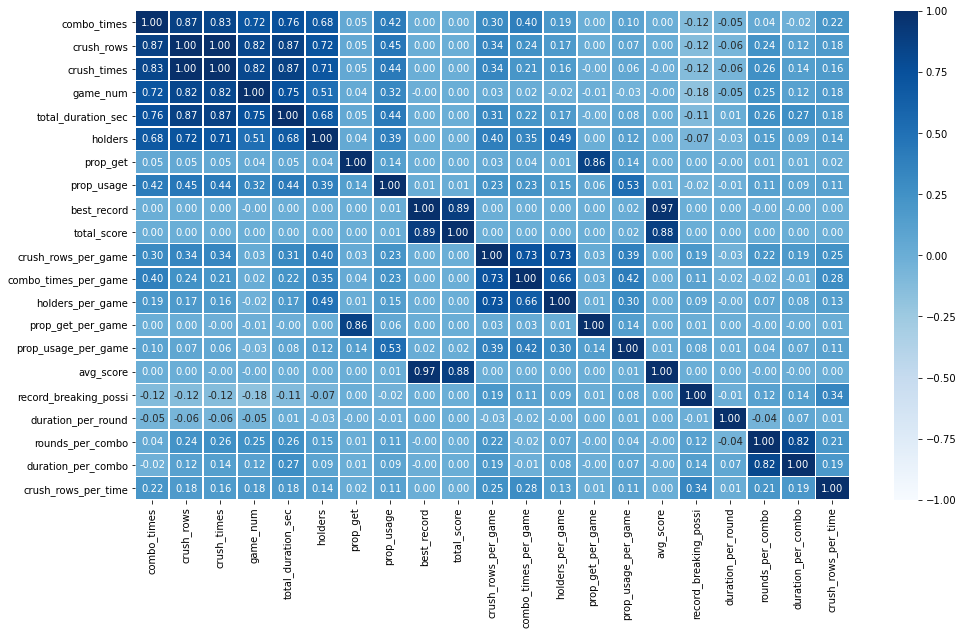

In [86]:
plt.subplots(figsize=(16, 9))
sns.heatmap(user_classification_data[real_feature].corr(), annot=True, linewidths=.6, fmt='.2f', vmax=1, vmin=-1, center=0, cmap='Blues')

In [87]:
y = np.array(user_classification_data['retended'])
X = np.array(user_classification_data[real_feature])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [120]:
clf=RandomForestClassifier(max_depth=20,verbose=3)
clf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.9s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.7min finished


RandomForestClassifier(max_depth=20, verbose=3)

In [121]:
pred_train=clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, pred_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


Accuracy: 0.7881907142857143


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.0s finished


In [122]:
pred_test=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


Accuracy: 0.689415


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.3s finished


<h1>AUC score</h1>

In [123]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_test)
fpr_train, tpr_train, thre_train = metrics.roc_curve(y_train, pred_train)
auc_train = metrics.roc_auc_score(y_train,pred_train)
print('AUC_train: %.3f' % auc_train)
auc_test = metrics.roc_auc_score(y_test,pred_test)
print('AUC_test: %.3f' % auc_test)

AUC_train: 0.773
AUC_test: 0.672


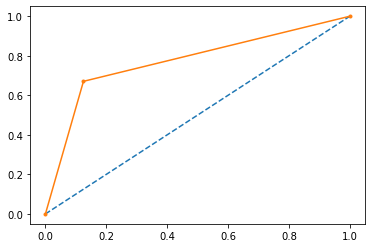

In [124]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, marker='.')
plt.show()

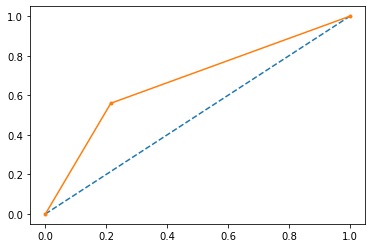

In [125]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

<h1>feature importance</h1>

No handles with labels found to put in legend.


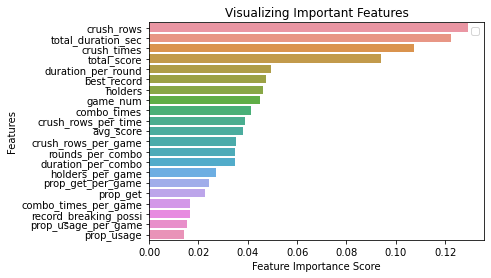

In [126]:
feature_imp = pd.Series(clf.feature_importances_,index=real_feature).sort_values(ascending=False)
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
crush_rows
crush_times
best_record
round_num
game_num